<center><h1> CRNN Model for Image Classification

<h2>**NOTE FOR LOADING SAVED MODEL: Load model first up to the RUN cell (108),and then skip to the load model section

https://www.kaggle.com/uysimty/keras-cnn-dog-or-cat-classification

<H1>Set Current Directory</H1>

In [1]:
import pandas as pd

In [2]:
import os
os.chdir('/Users/matthewgrossman/Documents/PythonML/Librosa')
os.getcwd()

'/Users/matthewgrossman/Documents/PythonML/Librosa'

## %X%X%X%X%X%X%X%X%X%X%X%X%X%X%X%X%X%X%X%X%X%X%X%X%X%X%X%

<h1>List of image filenames -- DELETED

In [ ]:
## %X%X%X%X%X%X%X%X%X%X%X%X%X%X%X%X%X%X%X%X%X%X%X%X%X%X%X%

<h1> Define Constants

In [3]:
FAST_RUN = False
IMAGE_WIDTH=432
IMAGE_HEIGHT=288
IMAGE_SIZE=(IMAGE_WIDTH, IMAGE_HEIGHT)
IMAGE_CHANNELS=3

## %%%%%% Load CSV with raw signals

In [4]:
import os
import pandas as pd
os.getcwd()
signal_df = pd.read_csv('signal_df_catcode.csv')  
signal_df

,Clip_Name,S_Arrays,cat_1good
0,arianagrande0.mp3,[[0.0000000e+00 0.0000000e+00 0.0000000e+00 .....,0
1,arianagrande1.mp3,[[7.5351334e-01 6.8561620e-01 2.6914307e-01 .....,0
2,arianagrande10.mp3,[[3.5375991e+00 2.1095054e+00 4.6067756e-01 .....,0
3,arianagrande11.mp3,[[4.8137438e-01 4.2199659e+00 2.8198061e+00 .....,0
4,arianagrande12.mp3,[[3.15856419e+01 1.59239368e+01 1.61280990e+00...,0
5,arianagrande13.mp3,[[2.0991205e+01 8.4260874e+00 2.6683488e+00 .....,0
6,arianagrande14.mp3,[[2.72678733e+00 2.69357622e-01 8.95281696e+00...,0
7,arianagrande15.mp3,[[1.94474831e+01 7.24913168e+00 5.03744662e-01...,0
8,arianagrande16.mp3,[[6.1720343e+00 2.3729343e+00 2.5635967e+00 .....,0
9,arianagrande17.mp3,[[4.35827971e+00 1.13169980e+00 1.42059338e+00...,0


## %%%%%% S %%%% K %%% I %%%%%% P

<h1> Create df of all images and labels

## %X%X%X%X%X%X%X%X%X%X%X%X%X%X%X%X%X%X%X%X%X%X%X%X%X%X%X%

### Upload CSV, create GENRES, and run NN straight from DF ARRAYS using same format here >> but with rows instead of files

<h1> Value Counts for both Categories (1= good music, 2 = control)

In [5]:
signal_df['cat_1good'].value_counts()

1    542
0    504
Name: cat_1good, dtype: int64

In [6]:
signal_df['cat_1good'].value_counts().plot.bar()

<h1> Show random spectrogram

In [7]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
sample = random.choice(image_files)

img = mpimg.imread(sample)
imgplot = plt.imshow(img)

NameError: name 'image_files' is not defined

<h1> Call the model and model features (early stopping, 

In [52]:
from IPython.display import Image
Image("C:/Users/mattm/Downloads/ebkMGGu.jpg")

FileNotFoundError: No such file or directory: 'C:/Users/mattm/Downloads/ebkMGGu.jpg'

FileNotFoundError: No such file or directory: 'C:/Users/mattm/Downloads/ebkMGGu.jpg'

<IPython.core.display.Image object>

<li> Input Layer: It represent input image data. It will reshape image into single diminsion array. Example your image is 64x64 = 4096, it will convert to (4096,1) array.</li>
<li>Conv Layer: This layer will extract features from image. </li>
<li>Pooling Layer: This layerreduce the spatial volume of input image after convolution. </li>
<li>Fully Connected Layer: It connect the network from a layer to another layer </li>
<li>Output Layer: It is the predicted values layer. </li>

In [8]:
# Input Layer: It represent input image data. It will reshape image into single diminsion array. Example your image is 64x64 = 4096, it will convert to (4096,1) array.
# Conv Layer: This layer will extract features from image.
# Pooling Layer: This layerreduce the spatial volume of input image after convolution.
# Fully Connected Layer: It connect the network from a layer to another layer
# Output Layer: It is the predicted values layer.
import tensorflow
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization



model = Sequential()

# Conv Layer
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

#Pooling Layer
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Fully Connected Layer
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Output Layer
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax')) # 2 because we have cat and dog classes

model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 430, 286, 32)      896       
_________________________________________________________________
batch_normalization (BatchNo (None, 430, 286, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 215, 143, 32)      0         
_________________________________________________________________
dropout (Dropout)            (None, 215, 143, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 213, 141, 64)      18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 213, 141, 64)      256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 106, 70, 64)       0

In [9]:
# To prevent over fitting we will stop the learning after 10 epochs and val_loss value not decreased

from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

earlystop = EarlyStopping(patience=10)

In [10]:
# We will reduce the learning rate when then accuracy not increase for 2 steps

learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=2, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

In [11]:
# Because we will use image genaretor with class_mode="categorical". We need to convert column category into string. 
# Then imagenerator will convert it one-hot encoding which is good for our classification.

# So we will convert 1 to dog and 0 to cat

callbacks = [earlystop, learning_rate_reduction]

<center><h1>THIS IS A BINARY MODEL: SEE CODES BELOW </h1></center>

In [12]:
signal_df["category"] = signal_df["cat_1good"].replace({0: 'control', 1: 'preferred'}) 

In [13]:
import scipy
print(scipy.__version__)

1.5.4


In [14]:
from sklearn.model_selection import train_test_split

train_df, validate_df = train_test_split(signal_df, test_size=0.20, random_state=42)
train_df = train_df.reset_index(drop=True)
validate_df = validate_df.reset_index(drop=True)

In [15]:
train_df['category'].value_counts()

preferred    438
control      398
Name: category, dtype: int64

In [16]:
train_df['category'].value_counts().plot.bar()

In [17]:
validate_df['category'].value_counts()

control      106
preferred    104
Name: category, dtype: int64

In [18]:
validate_df['category'].value_counts().plot.bar()

In [19]:
total_train = train_df.shape[0]
total_validate = validate_df.shape[0]
batch_size=15

In [20]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img

train_datagen = ImageDataGenerator(
    rotation_range=15,
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
)

train_generator = train_datagen.flow_from_dataframe(
    train_df, 
    "C:/Users/mattm/Documents/Python/librosa/5_tracks_experiment/Audio/Train Data/Preferred Music/3sec_pref", 
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=batch_size
)

KeyError: 'filename'

In [47]:
validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_dataframe(
    validate_df, 
    "C:/Users/mattm/Documents/Python/librosa/5_tracks_experiment/Audio/Train Data/Preferred Music/3sec_pref", 
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=batch_size
)

Found 209 validated image filenames belonging to 2 classes.


In [48]:
example_df = train_df.sample(n=1).reset_index(drop=True)
example_generator = train_datagen.flow_from_dataframe(
    example_df, 
    "C:/Users/mattm/Documents/Python/librosa/5_tracks_experiment/Audio/Train Data/Preferred Music/3sec_pref", 
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical'
)

Found 1 validated image filenames belonging to 1 classes.


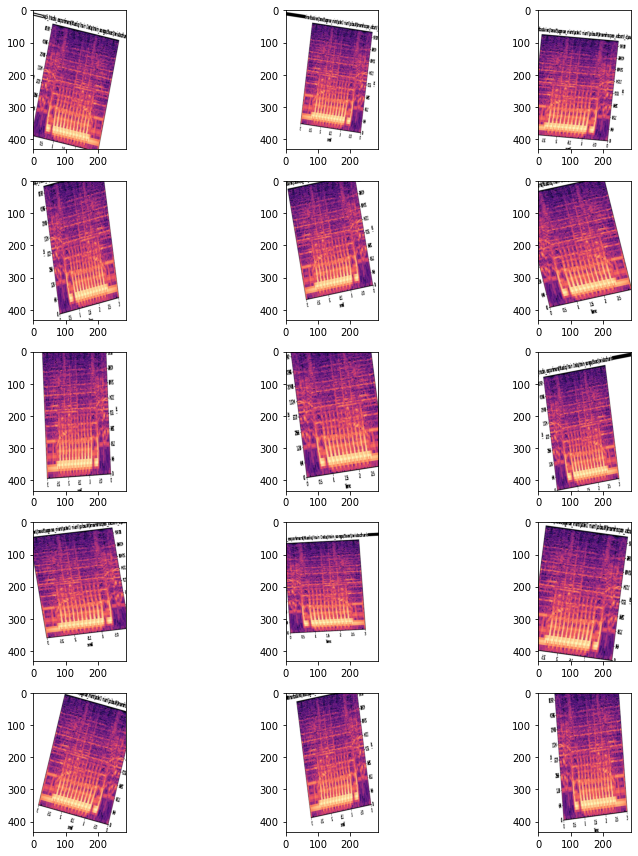

In [49]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 12))
for i in range(0, 15):
    #print(i)
    plt.subplot(5, 3, i+1)
    for X_batch, Y_batch in example_generator:
        image = X_batch[0]
        plt.imshow(image)
        break
plt.tight_layout()
plt.show()

<center><h1> RUNS MODEL: ONLY IF NOT SAVED MODEL

In [50]:
epochs=3 if FAST_RUN else 3
history = model.fit_generator(
    train_generator, 
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=total_validate//batch_size,
    steps_per_epoch=total_train//batch_size,
    callbacks=callbacks
)

print("TRAINING DONE!")

C:\Users\mattm\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/3
55/55 [==============================] - 419s 7s/step - loss: 0.9189 - accuracy: 0.7412 - val_loss: 64.3058 - val_accuracy: 0.5026
Epoch 2/3
55/55 [==============================] - 490s 9s/step - loss: 0.3381 - accuracy: 0.8960 - val_loss: 117.9728 - val_accuracy: 0.5128
Epoch 3/3
55/55 [==============================] - 434s 8s/step - loss: 0.2121 - accuracy: 0.9166 - val_loss: 65.6017 - val_accuracy: 0.5231
TRAINING DONE!


<h2>First model created with 5 classes between only the rap songs yielded only 61% accuracy. But adding in the control music with classical/rock/jazz etc. yielded 94% accuracy. Nice!

<h1> Save Model

In [51]:
from tensorflow import keras
model.save("C:/Users/mattm/Documents/Python/librosa/music_model_now2.h5")
model.save_weights("C:/Users/mattm/Documents/Python/librosa/music_model_weights_now2.h5")

<h2>Show Predictions

In [55]:
import matplotlib.pyplot as plt
import numpy as np

In [56]:
# A few random samples
use_samples = [5, 38, 3939, 27389]

# Generate plots for samples
for sample in use_samples:
    
    # Generate a plot
    reshaped_image = input_train[sample].reshape((img_width, img_height))
    plt.imshow(reshaped_image)
    plt.show()

NameError: name 'input_train' is not defined

<h1>Load Model after initializing

In [30]:
import os

os.chdir('C:/Users/mattm/Documents/Python/librosa/')

In [31]:
# This DEPENDS on the two .hf (model and weights) bing in the /librosa dir

import keras
import tensorflow as tf
from keras.models import load_model

model = keras.models.load_model("music_model_now.h5")

model.load_weights("music_model_weights_now.h5")

In [33]:
model.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_40 (Conv2D)           (None, 430, 286, 32)      896       
_________________________________________________________________
batch_normalization_53 (Batc (None, 430, 286, 32)      128       
_________________________________________________________________
max_pooling2d_40 (MaxPooling (None, 215, 143, 32)      0         
_________________________________________________________________
dropout_53 (Dropout)         (None, 215, 143, 32)      0         
_________________________________________________________________
conv2d_41 (Conv2D)           (None, 213, 141, 64)      18496     
_________________________________________________________________
batch_normalization_54 (Batc (None, 213, 141, 64)      256       
_________________________________________________________________
max_pooling2d_41 (MaxPooling (None, 106, 70, 64)     

<h1> Virtualize Training

NameError: name 'history' is not defined

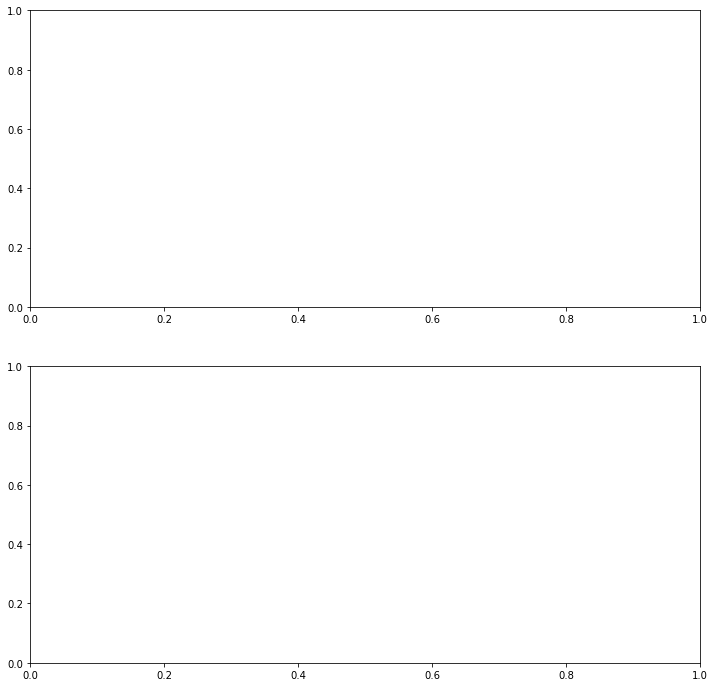

In [31]:
import numpy as np

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))
ax1.plot(history.history['loss'], color='b', label="Training loss")
ax1.plot(history.history['val_loss'], color='r', label="validation loss")
ax1.set_xticks(np.arange(1, epochs, 1))
ax1.set_yticks(np.arange(0, 1, 0.1))

ax2.plot(history.history['acc'], color='b', label="Training accuracy")
ax2.plot(history.history['val_acc'], color='r',label="Validation accuracy")
ax2.set_xticks(np.arange(1, epochs, 1))

legend = plt.legend(loc='best', shadow=True)
plt.tight_layout()
plt.show()

<h1>Prepare Testing Data

In [32]:
# Imports PIL module 
from PIL import Image
  
# open method used to open different extension image file
im = Image.open(r"C:\Users\mattm\Documents\Python\librosa\5_tracks_experiment\Audio\Train Data\Preferred Music\3sec_pref\andrechunk4.mp3.png") 
  
# This method will show image in any image viewer 
im.show() 

In [61]:
newsize = (300, 300)
im1 = im.resize(newsize)
im1.show()

<center><h1> Model Weights, Biases, Filters </h1></center>

https://machinelearningmastery.com/how-to-visualize-filters-and-feature-maps-in-convolutional-neural-networks/

In [33]:
# summarize the model
model.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_40 (Conv2D)           (None, 430, 286, 32)      896       
_________________________________________________________________
batch_normalization_53 (Batc (None, 430, 286, 32)      128       
_________________________________________________________________
max_pooling2d_40 (MaxPooling (None, 215, 143, 32)      0         
_________________________________________________________________
dropout_53 (Dropout)         (None, 215, 143, 32)      0         
_________________________________________________________________
conv2d_41 (Conv2D)           (None, 213, 141, 64)      18496     
_________________________________________________________________
batch_normalization_54 (Batc (None, 213, 141, 64)      256       
_________________________________________________________________
max_pooling2d_41 (MaxPooling (None, 106, 70, 64)     

<h2>Convolutional Layer Shapes</h2>

In [62]:
# summarize filters in each convolutional layer
from keras.applications.vgg16 import VGG16
from matplotlib import pyplot

# load the model
model = model

# summarize filter shapes
for layer in model.layers:
    # check for convolutional layer
    if 'conv' not in layer.name:
        continue
    # get filter weights
    filters, biases = layer.get_weights()
    print(layer.name, filters.shape)

conv2d_40 (3, 3, 3, 32)
conv2d_41 (3, 3, 32, 64)
conv2d_42 (3, 3, 64, 128)


<h2>Convolutional Layer Identifications (Layer # 0, 4, 8)</h2>

In [ ]:
model.layers

In [63]:
# layers 0, 4, and 8 are the Conv layers
print(model.layers[0]) 
print(model.layers[4])
print(model.layers[8])

In [64]:
# model.get_weights(): returns a list of all weight tensors in the model, as Numpy arrays.

weights = model.get_weights()
weights

[array([[[[-4.64839190e-02,  2.23631412e-02,  7.63836727e-02,
           -1.20194256e-01, -1.09193236e-01,  1.00955456e-01,
           -1.00524165e-01, -2.37216018e-02, -5.44600524e-02,
           -4.38778512e-02,  1.33977190e-01,  3.54914041e-03,
            6.37426749e-02, -1.11419596e-01, -1.04909465e-01,
           -4.65683155e-02,  1.16654314e-01, -2.38219537e-02,
           -1.20337538e-01,  4.86659594e-02, -4.38971706e-02,
           -3.50954421e-02,  8.05317461e-02, -1.08820617e-01,
           -1.16937950e-01, -5.96365742e-02, -5.60157038e-02,
           -5.00619188e-02,  1.17300570e-01, -1.24755532e-01,
            2.39414889e-02,  2.11004652e-02],
          [ 1.32562757e-01, -1.41695231e-01,  4.86855954e-02,
           -6.24088049e-02, -1.11115523e-01, -2.08368488e-02,
           -1.23523384e-01, -7.22569823e-02,  1.16665855e-01,
            7.46030658e-02,  1.40692502e-01,  6.04606085e-02,
            4.04597633e-03,  6.46494387e-04, -7.00694323e-02,
           -4.48157750e-

<h1> Visualize the model filter weights</h1>

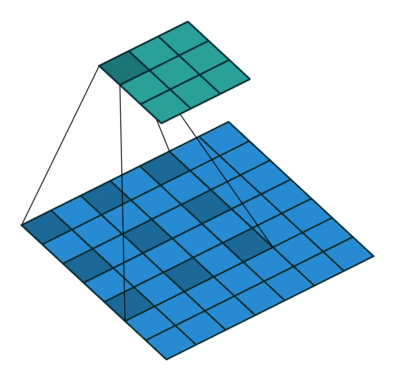

In [65]:
from IPython.display import Image

Image(filename="C:/Users/mattm/Documents/Python/librosa/5_tracks_experiment/filter.gif")

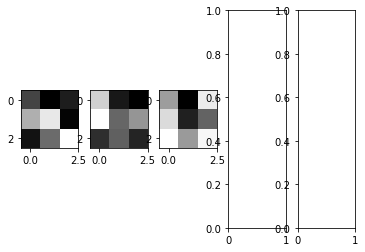

In [60]:
layers = model.layers
layer_ids = [0,4,8]
#plot the filters
fig,ax = plt.subplots(nrows=1,ncols=5)
for i in range(3):
    print(model.layers[i])
    ax[i].imshow(layers[layer_ids[i]].get_weights()[0][:,:,:,0][:,:,0],cmap='gray')

In [30]:
#this rerutns only one layer, which is ALSO in the total model weights array above
print(model.layers[0])
model.layers[0].get_weights()

[array([[[[-4.64839190e-02,  2.23631412e-02,  7.63836727e-02,
           -1.20194256e-01, -1.09193236e-01,  1.00955456e-01,
           -1.00524165e-01, -2.37216018e-02, -5.44600524e-02,
           -4.38778512e-02,  1.33977190e-01,  3.54914041e-03,
            6.37426749e-02, -1.11419596e-01, -1.04909465e-01,
           -4.65683155e-02,  1.16654314e-01, -2.38219537e-02,
           -1.20337538e-01,  4.86659594e-02, -4.38971706e-02,
           -3.50954421e-02,  8.05317461e-02, -1.08820617e-01,
           -1.16937950e-01, -5.96365742e-02, -5.60157038e-02,
           -5.00619188e-02,  1.17300570e-01, -1.24755532e-01,
            2.39414889e-02,  2.11004652e-02],
          [ 1.32562757e-01, -1.41695231e-01,  4.86855954e-02,
           -6.24088049e-02, -1.11115523e-01, -2.08368488e-02,
           -1.23523384e-01, -7.22569823e-02,  1.16665855e-01,
            7.46030658e-02,  1.40692502e-01,  6.04606085e-02,
            4.04597633e-03,  6.46494387e-04, -7.00694323e-02,
           -4.48157750e-

In [67]:
model.layers[0].set_weights([weight_matrix, bias_vector])

NameError: name 'weight_matrix' is not defined

<h2>Filters</h2>

In [26]:
# summarize filters in each convolutional layer
from keras.applications.vgg16 import VGG16
from matplotlib import pyplot
# load the model
model = model
# summarize filter shapes
for layer in model.layers:
# check for convolutional layer
    if 'conv' not in layer.name:
        continue
    # get filter weights
    filters, biases = layer.get_weights()
    print(layer.name, filters.shape)

conv2d_40 (3, 3, 3, 32)
conv2d_41 (3, 3, 32, 64)
conv2d_42 (3, 3, 64, 128)


In [27]:
# retrieve weights from the second hidden layer
filters[0]

array([[[ 0.00938831,  0.02257547, -0.01783999, ..., -0.00547777,
         -0.04456263, -0.01950137],
        [ 0.06170635, -0.05192341, -0.02962408, ...,  0.04871518,
         -0.00750266, -0.01624146],
        [-0.00890194, -0.03128463,  0.02942728, ...,  0.05787626,
         -0.01091165,  0.02278094],
        ...,
        [-0.0259305 , -0.01630546,  0.04470403, ...,  0.05173091,
         -0.01905705,  0.04828969],
        [ 0.07763928,  0.0068599 ,  0.06862082, ...,  0.03074864,
          0.06968202,  0.07248116],
        [ 0.04375874,  0.06033878,  0.065795  , ...,  0.04441529,
          0.01932325,  0.03533623]],

       [[-0.04353385, -0.00301872, -0.0167568 , ...,  0.02019196,
         -0.01512701,  0.00370624],
        [ 0.0068015 ,  0.0504474 , -0.02555396, ..., -0.00027967,
          0.03465044,  0.02510252],
        [-0.06466374,  0.02488452,  0.04161667, ...,  0.00409366,
         -0.02936069, -0.06093407],
        ...,
        [ 0.06064671,  0.02504568,  0.03194023, ...,  

<h1> Visualize Filters

<h4>

<li>Iterate through all the layers of the model using model.layers
    <br>
<li>If the layer is a convolutional layer, then extract the weights and bias values using get_weights() for that layer.
    <br>
<li>Normalize the weights for the filters between 0 and 1
    <br>
<li>Plot the filters for each of the convolutional layers and all the channels. For Color image, you will have three channels for RGB. For a grayscale image, the number of channels will be 1
</h4>

conv2d_40 (3, 3, 64, 128)
32


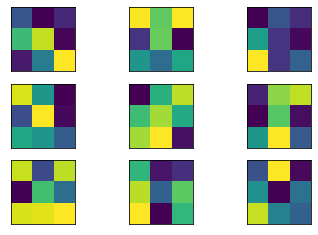

conv2d_41 (3, 3, 3, 32)
64


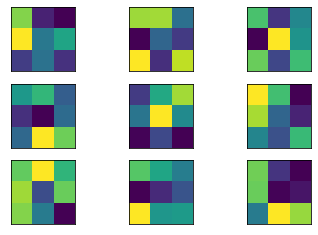

conv2d_42 (3, 3, 32, 64)
128


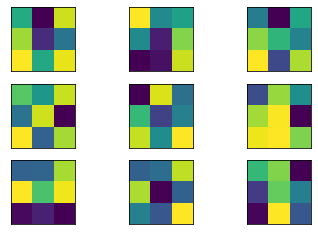

In [28]:
## ARTICLES ##

# https://towardsdatascience.com/convolutional-neural-network-feature-map-and-filter-visualization-f75012a5a49c
# https://machinelearningmastery.com/how-to-visualize-filters-and-feature-maps-in-convolutional-neural-networks/

#######################################


# flter.shape 3 since there are 3 conv layers

#Iterate thru all the layers of the model
for layer in model.layers:
    if 'conv' in layer.name:

        weights, bias= layer.get_weights()
        print(layer.name, filters.shape)
        
        #normalize filter values between  0 and 1 for visualization
        f_min, f_max = weights.min(), weights.max()
        filters = (weights - f_min) / (f_max - f_min)  
        print(filters.shape[3])
        filter_cnt=1
        
        #plotting all the filters
        for i in range(filters.shape[1]):
            #get the filters
            filt=filters[:,:,:, i]
            #plotting each of the channel, color image RGB channels
            for j in range(filters.shape[0]):
                ax= plt.subplot(filters.shape[1], filters.shape[0], filter_cnt  )
                ax.set_xticks([])
                ax.set_yticks([])
                plt.imshow(filt[:,:, j])
                filter_cnt+=1
        plt.show()


In [29]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
import os
import numpy as np
import matplotlib.pyplot as plt

In [30]:
os.chdir('C:/Users/mattm/Documents/Python/librosa/5_tracks_experiment/Audio/Train Data/Preferred Music/3sec_pref')
#os.getcwd()


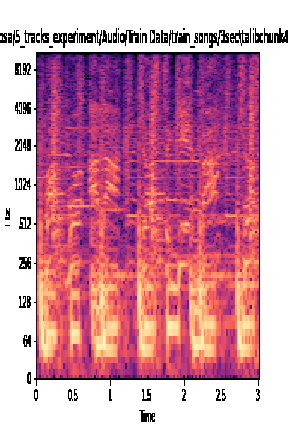

In [31]:
img = load_img('talibchunk43.mp3.png', target_size=(432, 288))
img

conv2d_40 (3, 3, 64, 128)
32


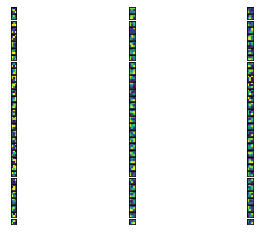

conv2d_41 (3, 3, 3, 32)
64


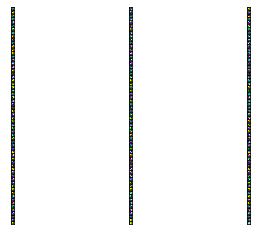

conv2d_42 (3, 3, 32, 64)
128


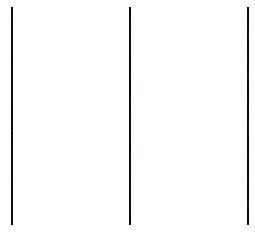

In [32]:
for layer in model.layers:
    if 'conv' in layer.name:
        weights, bias= layer.get_weights()
        print(layer.name, filters.shape)
        
        #normalize filter values between  0 and 1 for visualization
        f_min, f_max = weights.min(), weights.max()
        filters = (weights - f_min) / (f_max - f_min)  
        print(filters.shape[3])
        filter_cnt=1
        
        #plotting all the filters
        for i in range(filters.shape[3]):
            #get the filters
            filt=filters[:,:,:, i]
            #plotting each of the channel, color image RGB channels
            for j in range(filters.shape[0]):
                ax= plt.subplot(filters.shape[3], filters.shape[0], filter_cnt  )
                ax.set_xticks([])
                ax.set_yticks([])
                plt.imshow(filt[:,:, j])
                filter_cnt+=1
        plt.show()

<h1> Apply Filters to Sample Image

<h1> FIRST METHOD: FEATURE REPRESENTATIONS

<h1> NEW CODE

In [225]:
layers = model.weights
[ layers[i].name for i in range( len(layers) ) ]

['conv2d_40_2/kernel:0',
 'conv2d_40_2/bias:0',
 'batch_normalization_53_2/gamma:0',
 'batch_normalization_53_2/beta:0',
 'conv2d_41_2/kernel:0',
 'conv2d_41_2/bias:0',
 'batch_normalization_54_2/gamma:0',
 'batch_normalization_54_2/beta:0',
 'conv2d_42_2/kernel:0',
 'conv2d_42_2/bias:0',
 'batch_normalization_55_2/gamma:0',
 'batch_normalization_55_2/beta:0',
 'dense_27_2/kernel:0',
 'dense_27_2/bias:0',
 'batch_normalization_56_2/gamma:0',
 'batch_normalization_56_2/beta:0',
 'dense_28_2/kernel:0',
 'dense_28_2/bias:0',
 'batch_normalization_53_2/moving_mean:0',
 'batch_normalization_53_2/moving_variance:0',
 'batch_normalization_54_2/moving_mean:0',
 'batch_normalization_54_2/moving_variance:0',
 'batch_normalization_55_2/moving_mean:0',
 'batch_normalization_55_2/moving_variance:0',
 'batch_normalization_56_2/moving_mean:0',
 'batch_normalization_56_2/moving_variance:0']

In [34]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

# The dimensions of our input image
img_width = 180
img_height = 180
# Our target layer: we will visualize the filters from this layer.
# See `model.summary()` for list of layer names, if you want to change this.

In [24]:
from IPython.display import Image, display


os.chdir("C:/Users/mattm/Documents/Python/librosa/5_tracks_experiment/Audio/Train Data/Preferred Music/3sec_pref/")


img = load_img('yoyoma58.mp3.png', target_size=(432, 288))
img

NameError: name 'load_img' is not defined

In [33]:
model.layers

In [27]:
model.layers[1]

<h1>Lets try direct link, https://www.tensorflow.org/tutorials/generative/deepdream</h1>

<h1><li> Figure out how to define the feature extractor!

<h3>

Resources <br><br>
<li>\href{https://www.youtube.com/watch?v=O4uBa0KMeNY}<br><br>
<li>\href{https://distill.pub/2020/circuits/visualizing-weights/<br><br>
<li>\href{https://colab.research.google.com/drive/19cmX6U70zovssqIbAJaWFUEWNu4AIZBF?usp=sharing<br><br>
<li>\href{https://www.analyticsvidhya.com/blog/2019/05/understanding-visualizing-neural-networks/ <br><br>
<li>\href{https://raghakot.github.io/keras-vis/<br>
    
<br><br>VISUALIZE WEIGHTS

<h1> APPLY TENSORFLOW CORE DEEPDREAM MODULE

https://www.tensorflow.org/tutorials/generative/deepdream?fbclid=IwAR3J2_vfyJySNCsmuFtZ0r5Zu6He9WtL4xH22ZRihY_P5LL9VzBix-fnMJw

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib as mpl
import IPython.display as display
import PIL.Image
from tensorflow.keras.preprocessing import image

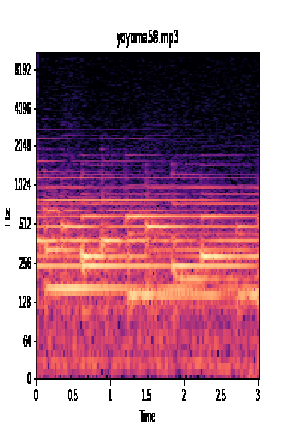

In [35]:
# Download an image and read it into a NumPy array.


# Normalize an image
def deprocess(img):
    img = 255*(img + 1.0)/2.0
    return tf.cast(img, tf.uint8)

# Display an image
def show(img):
    display.display(PIL.Image.fromarray(np.array(img)))


# Downsizing the image makes it easier to work with.
original_img = load_img('yoyoma58.mp3.png', target_size=(432, 288))
#show(original_img)
original_img

In [36]:
base_model = model

<h2>This saves the layer info in correct format

In [37]:
conv_layers = []
for layer in base_model.layers:
    if 'Conv2D' in str(layer):
        print(layer.name)
    else:
        continue

conv2d_40
conv2d_41
conv2d_42


In [38]:
base_model.layers[1].input



<tf.Tensor 'conv2d_40/Relu:0' shape=(None, 430, 286, 32) dtype=float32>

In [39]:
base_model.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_40 (Conv2D)           (None, 430, 286, 32)      896       
_________________________________________________________________
batch_normalization_53 (Batc (None, 430, 286, 32)      128       
_________________________________________________________________
max_pooling2d_40 (MaxPooling (None, 215, 143, 32)      0         
_________________________________________________________________
dropout_53 (Dropout)         (None, 215, 143, 32)      0         
_________________________________________________________________
conv2d_41 (Conv2D)           (None, 213, 141, 64)      18496     
_________________________________________________________________
batch_normalization_54 (Batc (None, 213, 141, 64)      256       
_________________________________________________________________
max_pooling2d_41 (MaxPooling (None, 106, 70, 64)     

[<tf.Tensor 'conv2d_40/Relu:0' shape=(None, 430, 286, 32) dtype=float32>,
 <tf.Tensor 'conv2d_41/Relu:0' shape=(None, 213, 141, 64) dtype=float32>]

In [43]:
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, MaxPool2D, Dropout

# Maximize the activations of these layers
names = ['conv2d_40', 'conv2d_41']
layers = [base_model.get_layer(name).output for name in names]
print(layers)
# Create the feature extraction model
dream_model = keras.Model(inputs=base_model.input, outputs=layers)

[<tf.Tensor 'conv2d_40/Relu:0' shape=(None, 430, 286, 32) dtype=float32>, <tf.Tensor 'conv2d_41/Relu:0' shape=(None, 213, 141, 64) dtype=float32>]


In [45]:
def calc_loss(img, model):
    
  # Pass forward the image through the model to retrieve the activations.
  # Converts the image into a batch of size 1.
    img_batch = tf.expand_dims(img, axis=0)
    layer_activations = model(img_batch)
    if len(layer_activations) == 1:
        layer_activations = [layer_activations]

    losses = []
    for act in layer_activations:
        loss = tf.math.reduce_mean(act)
        losses.append(loss)

    return  tf.reduce_sum(losses)

In [48]:
class DeepDream(tf.Module):
    def __init__(self, model):
        self.model = model

    @tf.function(
        input_signature=(
        tf.TensorSpec(shape=[None,None,3], dtype=tf.float32),
        tf.TensorSpec(shape=[], dtype=tf.int32),
        tf.TensorSpec(shape=[], dtype=tf.float32),)
  )
    def __call__(self, img, steps, step_size):
        
        print("Tracing")
        loss = tf.constant(0.0)
        for n in tf.range(steps):
            with tf.GradientTape() as tape:
                
            
        # This needs gradients relative to `img`
        # `GradientTape` only watches `tf.Variable`s by default
                tape.watch(img)
                loss = calc_loss(img, self.model)

    # Calculate the gradient of the loss with respect to the pixels of the input image.
        gradients = tape.gradient(loss, img)

    # Normalize the gradients.
        gradients /= tf.math.reduce_std(gradients) + 1e-8 

    # In gradient ascent, the "loss" is maximized so that the input image increasingly "excites" the layers.
    # You can update the image by directly adding the gradients (because they're the same shape!)
        img = img + gradients*step_size
        img = tf.clip_by_value(img, -1, 1)

        return loss, img

In [49]:
deepdream = DeepDream(dream_model)

In [50]:
def run_deep_dream_simple(img, steps=100, step_size=0.01):
    
  # Convert from uint8 to the range expected by the model.
    img = tf.keras.applications.inception_v3.preprocess_input(img)
    img = tf.convert_to_tensor(img)
    step_size = tf.convert_to_tensor(step_size)
    steps_remaining = steps
    step = 0
    while steps_remaining:        
        if steps_remaining>100:
            run_steps = tf.constant(100)
        else:
            run_steps = tf.constant(steps_remaining)
        steps_remaining -= run_steps
        step += run_steps

        loss, img = deepdream(img, run_steps, tf.constant(step_size))

        display.clear_output(wait=True)
        show(deprocess(img))
        print ("Step {}, loss {}".format(step, loss))


    result = deprocess(img)
    display.clear_output(wait=True)
    show(result)

    return result

In [52]:
dream_img = run_deep_dream_simple(img=original_img, steps=100, step_size=0.01)

TypeError: unsupported operand type(s) for /=: 'Image' and 'float'